<a href="https://colab.research.google.com/github/Soledad09876/Challenge-Analisis-para-Venta-de-Tienda/blob/main/AluraStoreLatamChallengeAnalisisParaVenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [8]:
import pandas as pd

urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

facturacion = {}

for nombre, url in urls.items():
    df = pd.read_csv(url)

    df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")

    facturacion[nombre] = df["Precio"].sum()

for tienda, total in facturacion.items():
    print(f"Facturación {tienda}: ${total:,.2f}")

total_general = sum(facturacion.values())
print(f"\nFacturación total de todas las tiendas: ${total_general:,.2f}")


Facturación Tienda 1: $1,150,880,400.00
Facturación Tienda 2: $1,116,343,500.00
Facturación Tienda 3: $1,098,019,600.00
Facturación Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: $4,403,619,200.00


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [15]:
totales_tienda = {}

for nombre, url in urls.items():

    df = pd.read_csv(url)

    df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")

    ventas_categoria = (
        df.groupby("Categoría del Producto")["Precio"]
          .sum()
          .sort_values(ascending=False)
    )

    print(f"\nVentas por categoría en {nombre}:")
    for categoria, total in ventas_categoria.items():
        print(f"  {categoria}: ${total:,.2f}")

    total_tienda = ventas_categoria.sum()
    totales_tienda[nombre] = total_tienda
    print(f"  ➜ Total {nombre}: ${total_tienda:,.2f}")

total_general = sum(totales_tienda.values())
print("\nFacturación total de todas las tiendas:", f"${total_general:,.2f}")



Ventas por categoría en Tienda 1:
  Electrónicos: $429,493,500.00
  Electrodomésticos: $363,685,200.00
  Muebles: $187,633,700.00
  Instrumentos musicales: $91,299,000.00
  Deportes y diversión: $39,290,000.00
  Juguetes: $17,995,700.00
  Artículos para el hogar: $12,698,400.00
  Libros: $8,784,900.00
  ➜ Total Tienda 1: $1,150,880,400.00

Ventas por categoría en Tienda 2:
  Electrónicos: $410,831,100.00
  Electrodomésticos: $348,567,800.00
  Muebles: $176,426,300.00
  Instrumentos musicales: $104,990,300.00
  Deportes y diversión: $34,744,500.00
  Juguetes: $15,945,400.00
  Artículos para el hogar: $14,746,900.00
  Libros: $10,091,200.00
  ➜ Total Tienda 2: $1,116,343,500.00

Ventas por categoría en Tienda 3:
  Electrónicos: $410,775,800.00
  Electrodomésticos: $329,237,900.00
  Muebles: $201,072,100.00
  Instrumentos musicales: $77,380,900.00
  Deportes y diversión: $35,593,100.00
  Juguetes: $19,401,100.00
  Artículos para el hogar: $15,060,000.00
  Libros: $9,498,700.00
  ➜ Total 

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [16]:
col_calif = "Calificación"

for nombre, url in urls.items():

    df = pd.read_csv(url)

    df[col_calif] = pd.to_numeric(df[col_calif], errors="coerce")

    calif_prom = df[col_calif].mean()

    print(f"Calificación promedio de la {nombre}: {calif_prom:.2f}")

Calificación promedio de la Tienda 1: 3.98
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [17]:
col_precio   = "Precio"
col_producto = "Producto"
totales      = {}

for nombre, url in urls.items():
    df = pd.read_csv(url)

    df[col_precio] = pd.to_numeric(df[col_precio], errors="coerce")

    ingresos_prod = (
        df.groupby(col_producto)[col_precio]
          .sum()
          .sort_values(ascending=False)
    )

    totales[nombre] = ingresos_prod.sum()


    top3   = ingresos_prod.head(3)
    bottom3 = ingresos_prod.tail(3)

    print(f"\n{nombre} - TOP 3 productos que MÁS dinero generaron:")
    for prod, total in top3.items():
        print(f"  {prod} - Ingresos: ${total:,.2f}")

    print(f"\n{nombre} - TOP 3 productos que MENOS dinero generaron:")
    for prod, total in bottom3.items():
        print(f"  {prod} - Ingresos: ${total:,.2f}")

    print("-" * 60)

total_general = sum(totales.values())
print(f"\nFacturación total de todas las tiendas (verificación): ${total_general:,.2f}")


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142,150,200.00
  Refrigerador - Ingresos: $112,143,300.00
  Iphone 15 - Ingresos: $97,902,200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696,900.00
  Dinosaurio Rex - Ingresos: $688,900.00
  Cuerda para saltar - Ingresos: $652,800.00
------------------------------------------------------------

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113,225,800.00
  TV LED UHD 4K - Ingresos: $103,375,000.00
  Refrigerador - Ingresos: $97,632,500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856,900.00
  Dinosaurio Rex - Ingresos: $770,300.00
  Cubo mágico 8x8 - Ingresos: $643,600.00
------------------------------------------------------------

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99,889,700.00
  TV LED UHD 4K - Ingresos: $96,669,100.00
  Iphone 15

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [20]:
col_envio = "Costo de envío"

for nombre, url in urls.items():

    df = pd.read_csv(url)

    df[col_envio] = pd.to_numeric(df[col_envio], errors="coerce")

    envio_prom = df[col_envio].mean()

    print(f"{nombre} - Envío promedio: ${envio_prom:,.2f}")

Tienda 1 - Envío promedio: $26,018.61
Tienda 2 - Envío promedio: $25,216.24
Tienda 3 - Envío promedio: $24,805.68
Tienda 4 - Envío promedio: $23,459.46


Después de realizar los análisis, es hora de transformar sus resultados en visualizaciones que le ayuden a comprender mejor los patrones y los insights encontrados.

De acuerdo con funciones que haya creado, le recomendamos que genere al menos tres gráficos. Estos gráficos deben ser de diferentes tipos (como barras, líneas, dispersión, entre otros) para presentar una visión completa de los datos.

Recuerde que los gráficos deben complementar el análisis realizado, resaltando los puntos más relevantes, como los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

No es necesario mostrar una visualización en cada paso, pero al final del análisis debes generar los gráficos que consideres más útiles para interpretar los datos.

Consejo: Matplotlib ofrece una variedad de tipos de gráficos que son fáciles de implementar, lo que lo convierte en una excelente opción para principiantes. Utilice su creatividad para elegir los gráficos que mejor resalten las tendencias y los conocimientos de su análisis.

In [22]:
import matplotlib.pyplot as plt


In [49]:
COL_PRECIO   = "Precio"
COL_ENVIO    = "Costo de envío"
COL_RATING   = "Calificación"

revenue      = {}
avg_shipping = {}
avg_rating   = {}

for store, url in urls.items():
    df = pd.read_csv(url)

    df[COL_PRECIO] = pd.to_numeric(df[COL_PRECIO], errors="coerce")
    df[COL_ENVIO]  = pd.to_numeric(df[COL_ENVIO],  errors="coerce")
    df[COL_RATING] = pd.to_numeric(df[COL_RATING], errors="coerce")

    revenue[store]      = df[COL_PRECIO].sum()
    avg_shipping[store] = df[COL_ENVIO].mean()
    avg_rating[store]   = df[COL_RATING].mean()

rev_s      = pd.Series(revenue).sort_values(ascending=False)
ship_s     = pd.Series(avg_shipping).sort_values(ascending=False)
rating_s   = pd.Series(avg_rating).sort_values(ascending=False)


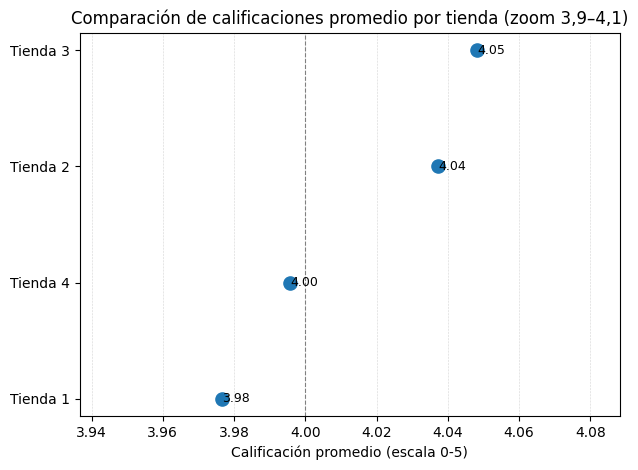

In [60]:
COL_RATING = "Calificación"

ratings = {}
for store, url in urls.items():
    df = pd.read_csv(url)
    df[COL_RATING] = pd.to_numeric(df[COL_RATING], errors="coerce")
    ratings[store] = df[COL_RATING].mean()

rating_s = pd.Series(ratings).sort_values(ascending=True)

plt.figure()
plt.scatter(rating_s.values, rating_s.index, s=90)
plt.axvline(4.0, color="grey", linestyle="--", linewidth=0.8)

for y, (x, raw) in enumerate(zip(rating_s.values, rating_s.values)):
    plt.text(x, rating_s.index[y], f"{raw:.2f}",
             va="center", ha="left", fontsize=9)

plt.xlim(rating_s.min() - 0.04, rating_s.max() + 0.04)
plt.xlabel("Calificación promedio (escala 0-5)")
plt.title("Comparación de calificaciones promedio por tienda (zoom 3,9–4,1)")
plt.ylabel("")
plt.grid(axis="x", linestyle=":", linewidth=0.4)
plt.tight_layout()

plt.show()


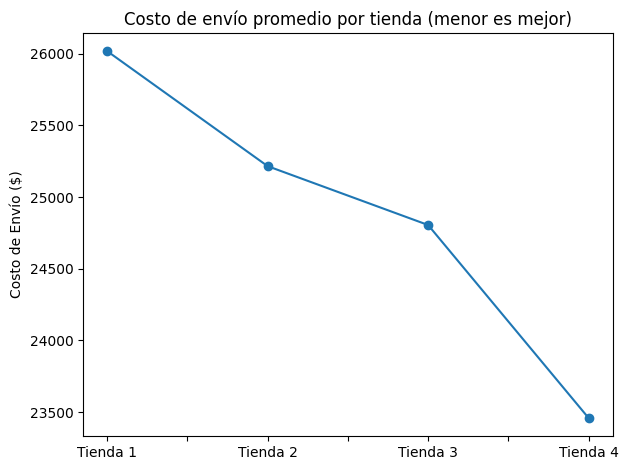

In [51]:
plt.figure()
ship_s.sort_index().plot(kind="line", marker="o")
plt.title("Costo de envío promedio por tienda (menor es mejor)")
plt.ylabel("Costo de Envío ($)")
plt.xlabel("")
plt.tight_layout()

plt.show()

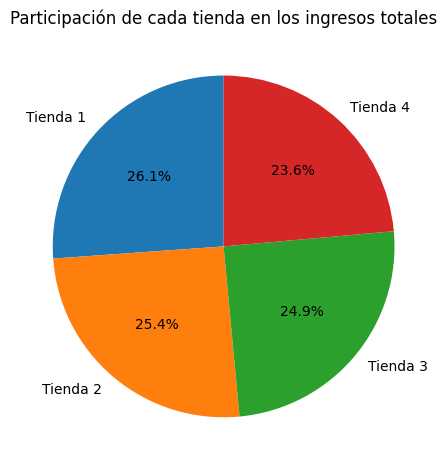

In [55]:
plt.figure()
rev_s.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participación de cada tienda en los ingresos totales")
plt.ylabel("")  # remueve etiqueta del eje Y
plt.tight_layout()

plt.show()

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

Esta actividad es un extra, por lo tanto es OPCIONAL.

En este extra, tendrás el desafío de explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras. Al utilizar las columnas de latitud y longitud, puede generar visualizaciones para comprender cómo varían las ventas según la ubicación geográfica.

Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

INFORME FINAL

Recomendación sobre la tienda de la red Alura Store que el Sr. Juan debería vender.

Introducción

Este informe sintetiza los hallazgos obtenidos con pandas y matplotlib tras examinar las cuatro tiendas de la red Alura Store. El propósito es identificar cuál de ellas conviene traspasar a un nuevo propietario, maximizando el rendimiento global del negocio. Para ello se evaluaron cinco factores:

1. Ingresos totales de cada tienda.
2. Categorías de productos que más y menos se venden.
3. Calificación promedio que los clientes otorgan a cada tienda.
4. Productos estrella y productos rezagados en términos de dinero generado.
5. Costo promedio de envío por tienda.

Tres gráficos clave que sirven de apoyo visual y que complementan el análisis:

1. Gráfico de barras verticales que señala cuánto factura cada tienda.

2. Gráfico de línea que compara, punto a punto, el costo de envío promedio por cada tienda.

3. Gráfico de puntos con zoom (entre 3,9 y 4,1) que grafica cuánto factura cada tienda.

Desarrollo

Ingresos totales:

La gráfica de barras muestra que la Tienda 1 lidera la facturación con aproximadamente 1.150 mil millones al  año ; Apenas detrás aparece la Tienda 2, con 1.116 mil millones, una diferencia de solo 3%. Las Tiendas 3 con 1.098 mil millones y 4 con $1.038 mil millones completan el cuadro con volúmenes ligeramente menores. Aunque este primer puesto parece ventajoso, el resto de los indicadores matiza su verdadera competitividad.

Calificación promedio:

El grafico de puntos, centrado en el rango 3,9 y 4,1, revela que la Tienda 1 es la única que queda por debajo del umbral de 4,0 (3,98); Esto significa más devoluciones, más reclamos y, en general, una reputación online que cuesta remontar. Las Tiendas 2 y 3 alcanzan 4,04 y 4,05 respectivamente, y la Tienda 4 se sitúa en 4,00 justo en la línea de corte. Esta diferencia, aunque numéricamente pequeña, se traduce en menor fidelidad y mayor tasa de devoluciones.

Costo promedio logístico:

La curva del grafico de línea coloca a la Tienda 1 nuevamente en

desventaja: cada envío le cuesta en promedio 26.018, la cifra más alta del grupo y aproximadamente 2.600 superior a la Tienda 4, la más eficiente con 23.459. La Tienda 2 mantiene un costo razonable de 25.216 y la Tienda 3 con 24.806 se sitúa entre ambas. Un margen de $2.600 pesos aproximados por pedido parece pequeño, pero al cabo del año merma las ganancias y obliga a ajustar precios.

Mix de categorías y rotación:

El desglose por categorías confirma que la Tienda 1 concentra ingresos en Electrónicos y Electrodomésticos, pero arrastra una larga “cola” de artículos de baja rotación (juguetes especializados, accesorios deportivos menores). Esa dispersión inmoviliza inventario y exige descuentos frecuentes. Por contraste, la Tienda 2 presenta un portafolio equilibrado —Electrónicos, Muebles y Deportes— sin excesos ociosos; la Tienda 3 mantiene balance con ligera preferencia por Muebles, mientras que la Tienda 4 se especializa en electrodomésticos ligeros con buena rotación.

Productos top y rezagados:

Por otra parte, en cuanto al análisis de venta de las Categorías más y menos vendidas de cada tienda, la Tienda 1 depende casi exclusivamente de Electrónicos y Electrodomésticos, y el resto queda diluido. Los tres artículos que más venden en la Tienda 1 (TV 4K, refrigerador, iPhone 15) concentran gran parte del ingreso; sin embargo, sus tres peores productos apenas alcanzan los $650 000 anuales, evidencia de un inventario que ocupa espacio y capital.

Por su parte, la Tienda 2 reparte sus ingresos entre Electrónicos, Muebles y Deportes, sin un “cuello de botella” y la Tienda 3 también es balanceada, con algo más de peso en Muebles. Mostrando segundas líneas de productos que siguen generando montos relevantes, lo que suaviza el riesgo.
Por último, la Tienda 4 se especializa sin tanto riesgo porque sus costos logísticos son los más bajos.

Conclusión

Considerando todos los factores antes mencionados, la recomendación el Sr. Juan es la venta de la Tienda 1. Si bien factura ligeramente más que sus pares, esa ventaja es frágil y viene acompañada de la peor satisfacción del cliente, el mayor costo de envío y un inventario poco eficiente. Las Tiendas 2 y 3 combinan altos ingresos con mejor reputación y costos logísticos controlados, mientras que la Tienda 4, aunque factura menos, destaca por su eficiencia operativa.
Vender la Tienda 1 ahora permitiría capitalizar su todavía elevado volumen antes de que la insatisfacción de los clientes y la ineficiencia logística reduzcan su valor de mercado. Con los recursos obtenidos, el Sr. Juan podría reforzar las alianzas con las Tiendas 2 y 3, las cuales se muestran más equilibradas y rentables, o invertir en optimizar los procesos de la red restante.


El README es un elemento clave en cualquier proyecto de desarrollo, ya que proporciona una descripción clara y detallada del propósito, la estructura y el uso del código.

Cuando participas en un proceso de selección, el README es imprescindible para comunicar cómo utilizar el proyecto.

Este archivo, con la extensión .md (Markdown), es el punto de referencia inicial para cualquiera que quiera entender y trabajar con su código.

Un buen README incluye información sobre la instalación, dependencias, cómo ejecutar el proyecto y posibles problemas o soluciones.

Un README bien estructurado facilita que otros desarrolladores comprendan el proyecto.

Aquí hay un artículo con los pasos para crear un README increíble:

Entrega del desafío